In [1]:
#Data Manipulation libraries 
import numpy as np
import pandas as pd

#Data Visualisation libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 

#Applying cool styles 
plt.style.use("ggplot")
rcParams['figure.figsize']=(12, 6)


# from sklearn.model_selection import train_test_split
# from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("datasets/animes.csv")
df.head(3)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss


In [3]:
episodes = df["episodes"].values
df["episodes"] = df["episodes"].fillna(np.mean(df["episodes"]))

In [4]:
beginner = []
pro = []
advanced = []
l_distances = []

for i in episodes:
    if i <= 100:
        l_distances.append(((((100-0)/2)-i)**2)**0.5) 
        # 50 as centroid for anime with eps lessthan 100
    elif i <= 500:
        l_distances.append(((((500-0)/2)-i)**2)**0.5) 
        # 250 as centroid for anime with eps lessthan 100
    else:
        l_distances.append(((((3057-0)/2)-i)**2)**0.5)
        # 3057(max eps for an anime)//2 as centroid for rest

for i in l_distances:
    print(i)

25.0
28.0
37.0
14.0
49.0
37.0
49.0
24.0
43.0
25.0
40.0
38.0
49.0
49.0
26.0
37.0
38.0
49.0
49.0
49.0
38.0
38.0
48.0
95.0
49.0
41.0
49.0
37.0
49.0
48.0
49.0
49.0
46.0
44.0
38.0
38.0
4.0
47.0
49.0
49.0
49.0
42.0
29.0
24.0
49.0
49.0
38.0
38.0
49.0
49.0
24.0
49.0
1.0
37.0
137.0
25.0
25.0
38.0
49.0
116.0
38.0
38.0
24.0
24.0
47.0
37.0
42.0
49.0
38.0
38.0
29.0
37.0
37.0
2.0
49.0
40.0
10.0
37.0
24.0
40.0
49.0
11.0
37.0
44.0
46.0
49.0
49.0
24.0
47.0
22.0
24.0
49.0
38.0
38.0
49.0
44.0
26.0
49.0
24.0
38.0
39.0
49.0
38.0
43.0
nan
49.0
49.0
37.0
49.0
38.0
49.0
49.0
38.0
136.0
37.0
49.0
24.0
37.0
49.0
26.0
83.0
44.0
49.0
12.0
25.0
1.0
49.0
44.0
49.0
45.0
38.0
37.0
49.0
37.0
49.0
49.0
49.0
49.0
37.0
37.0
38.0
26.0
47.0
49.0
30.0
49.0
45.0
49.0
49.0
75.0
38.0
49.0
37.0
15.0
48.0
47.0
49.0
26.0
26.0
2.0
49.0
49.0
46.0
49.0
40.0
49.0
38.0
38.0
46.0
49.0
25.0
49.0
49.0
37.0
49.0
22.0
49.0
38.0
49.0
27.0
48.0
49.0
49.0
24.0
26.0
72.0
38.0
40.0
49.0
48.0
26.0
33.0
141.0
49.0
38.0
148.0
45.0
38.0
24.0
24.0
0

48.0
46.0
nan
48.0
48.0
48.0
49.0
47.0
48.0
48.0
49.0
49.0
46.0
48.0
49.0
49.0
48.0
48.0
49.0
46.0
49.0
47.0
47.0
48.0
48.0
49.0
48.0
46.0
46.0
48.0
48.0
46.0
48.0
49.0
48.0
49.0
49.0
48.0
46.0
48.0
nan
48.0
48.0
49.0
48.0
48.0
48.0
48.0
48.0
48.0
48.0
48.0
49.0
49.0
48.0
48.0
47.0
49.0
48.0
49.0
47.0
48.0
48.0
47.0
48.0
49.0
46.0
48.0
47.0
49.0
48.0
49.0
48.0
45.0
nan
nan
49.0
48.0
nan
49.0
46.0
48.0
46.0
46.0
nan
48.0
48.0
48.0
49.0
49.0
48.0
49.0
nan
48.0
49.0
48.0
49.0
47.0
48.0
46.0
48.0
49.0
49.0
48.0
nan
47.0
48.0
49.0
49.0
48.0
48.0
47.0
46.0
46.0
48.0
48.0
48.0
48.0
48.0
48.0
48.0
44.0
48.0
48.0
49.0
44.0
46.0
48.0
48.0
48.0
48.0
46.0
48.0
48.0
48.0
46.0
48.0
49.0
nan
48.0
nan
48.0
48.0
48.0
nan
48.0
46.0
46.0
49.0
45.0
48.0
48.0
46.0
44.0
48.0
44.0
48.0
49.0
48.0
46.0
48.0
48.0
46.0
49.0
nan
47.0
49.0
48.0
49.0
48.0
48.0
44.0
49.0
44.0
46.0
48.0
49.0
48.0
48.0
47.0
48.0
49.0
46.0
47.0
49.0
nan
48.0
44.0
49.0
48.0
46.0
48.0
48.0
49.0
48.0
47.0
nan
48.0
48.0
49.0
48.0
47.0
47.0

49.0
49.0
43.0
49.0
49.0
49.0
46.0
48.0
49.0
37.0
15.0
49.0
48.0
49.0
2.0
36.0
47.0
nan
1.0
49.0
49.0
49.0
49.0
49.0
49.0
37.0
49.0
46.0
38.0
49.0
24.0
25.0
26.0
49.0
49.0
49.0
49.0
49.0
48.0
48.0
49.0
38.0
49.0
24.0
49.0
49.0
49.0
37.0
37.0
1.0
47.0
49.0
47.0
44.0
38.0
49.0
49.0
49.0
49.0
51.0
49.0
49.0
49.0
49.0
49.0
24.0
1.0
38.0
24.0
24.0
48.0
46.0
49.0
49.0
48.0
38.0
49.0
49.0
49.0
49.0
2.0
49.0
49.0
24.0
38.0
39.0
46.0
40.0
46.0
37.0
49.0
49.0
49.0
49.0
49.0
49.0
44.0
49.0
49.0
38.0
47.0
44.0
38.0
37.0
49.0
24.0
37.0
49.0
49.0
26.0
83.0
44.0
49.0
12.0
25.0
20.0
28.0
46.0
49.0
40.0
49.0
49.0
37.0
37.0
26.0
37.0
24.0
48.0
46.0
24.0
48.0
10.0
37.0
49.0
38.0
49.0
12.0
26.0
49.0
10.0
24.0
49.0
49.0
44.0
49.0
49.0
49.0
49.0
48.0
49.0
0.0
46.0
38.0
38.0
48.0
38.0
49.0
14.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
46.0
49.0
1.0
49.0
44.0
49.0
45.0
38.0
37.0
49.0
37.0
49.0
49.0
49.0
49.0
37.0
37.0
38.0
49.0
24.0
49.0
49.0
49.0
44.0
24.0
47.0
48.0
48.0
49.0
48.0
49.0
48.0
46.0
49.0
49.0
49.

49.0
9.0
37.0
49.0
37.0
49.0
45.0
44.0
38.0
24.0
49.0
49.0
49.0
49.0
48.0
47.0
49.0
49.0
49.0
44.0
49.0
38.0
49.0
49.0
49.0
48.0
49.0
45.0
49.0
49.0
49.0
49.0
49.0
32.0
49.0
47.0
49.0
49.0
44.0
49.0
49.0
49.0
37.0
49.0
49.0
49.0
49.0
49.0
49.0
4.0
48.0
44.0
47.0
49.0
38.0
49.0
26.0
44.0
48.0
37.0
40.0
38.0
49.0
49.0
49.0
37.0
49.0
49.0
37.0
12.0
49.0
49.0
25.0
49.0
49.0
26.0
38.0
38.0
49.0
38.0
49.0
37.0
47.0
26.0
1.0
32.0
49.0
38.0
49.0
49.0
49.0
49.0
46.0
49.0
49.0
49.0
49.0
48.0
1.0
38.0
49.0
1.0
45.0
47.0
38.0
48.0
37.0
49.0
25.0
49.0
13.0
38.0
38.0
26.0
12.0
49.0
49.0
38.0
38.0
49.0
48.0
37.0
49.0
46.0
49.0
49.0
49.0
49.0
48.0
49.0
49.0
49.0
48.0
49.0
46.0
49.0
48.0
49.0
49.0
49.0
38.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
39.0
49.0
49.0
48.0
49.0
49.0
49.0
49.0
49.0
40.0
37.0
48.0
49.0
49.0
49.0
49.0
49.0
11.0
46.0
49.0
38.0
49.0
49.0
49.0
49.0
48.0
49.0
38.0
49.0
48.0
49.0
49.0
49.0
49.0
49.0
47.0
37.0
49.0
46.0
49.0
2.0
11.0
38.0
49.0
49.0
26.0
42.0
49.0
nan
38.0
38.0
49.0
49.0
10

21.0
48.0
1.0
49.0
49.0
39.0
49.0
19.0
1.0
49.0
47.0
49.0
24.0
49.0
49.0
1.0
49.0
49.0
38.0
49.0
49.0
49.0
24.0
49.0
49.0
24.0
37.0
24.0
38.0
nan
49.0
49.0
49.0
48.0
48.0
49.0
49.0
49.0
40.0
nan
49.0
47.0
49.0
49.0
38.0
nan
41.0
38.0
49.0
37.0
18.0
0.0
37.0
45.0
49.0
2.0
49.0
49.0
nan
46.0
49.0
50.0
49.0
27.0
46.0
37.0
2.0
0.0
48.0
49.0
49.0
43.0
49.0
49.0
49.0
25.0
1.0
nan
49.0
49.0
49.0
nan
49.0
49.0
49.0
49.0
50.0
49.0
49.0
48.0
49.0
49.0
49.0
43.0
49.0
49.0
49.0
44.0
49.0
49.0
49.0
49.0
24.0
49.0
49.0
49.0
39.0
34.0
48.0
nan
45.0
49.0
24.0
49.0
49.0
49.0
49.0
49.0
38.0
47.0
11.0
48.0
38.0
49.0
40.0
48.0
49.0
49.0
nan
40.0
49.0
49.0
2.0
48.0
44.0
14.0
49.0
0.0
48.0
49.0
45.0
49.0
38.0
24.0
49.0
18.0
40.0
41.0
49.0
nan
48.0
49.0
38.0
49.0
49.0
2.0
49.0
49.0
49.0
37.0
49.0
49.0
49.0
0.0
49.0
42.0
49.0
49.0
44.0
38.0
49.0
49.0
49.0
49.0
26.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
37.0
49.0
45.0
1.0
1.0
20.0
8.0
24.0
24.0
49.0
43.0
49.0
37.0
11.0
26.0
26.0
26.0
49.0
49.0
49.0
nan
49.0
49.0


49.0
2.0
24.0
39.0
49.0
37.0
49.0
49.0
49.0
37.0
nan
49.0
49.0
35.0
49.0
42.0
49.0
nan
49.0
24.0
49.0
49.0
49.0
48.0
nan
24.0
49.0
48.0
2.0
49.0
44.0
49.0
38.0
49.0
49.0
45.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
nan
49.0
47.0
49.0
44.0
49.0
37.0
46.0
49.0
48.0
49.0
49.0
49.0
49.0
49.0
49.0
46.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
8.0
49.0
49.0
40.0
nan
49.0
42.0
49.0
49.0
49.0
49.0
49.0
49.0
40.0
37.0
37.0
37.0
49.0
49.0
49.0
38.0
49.0
nan
49.0
11.0
49.0
49.0
49.0
49.0
21.0
48.0
49.0
30.0
49.0
49.0
20.0
16.0
49.0
30.0
49.0
49.0
48.0
49.0
49.0
49.0
nan
2.0
44.0
37.0
38.0
44.0
49.0
24.0
49.0
49.0
49.0
49.0
43.0
49.0
49.0
49.0
49.0
49.0
37.0
49.0
49.0
24.0
49.0
24.0
49.0
45.0
35.0
49.0
49.0
nan
49.0
24.0
49.0
49.0
49.0
49.0
49.0
49.0
2.0
23.0
24.0
49.0
38.0
1.0
35.0
37.0
49.0
46.0
24.0
49.0
49.0
40.0
24.0
49.0
26.0
26.0
nan
38.0
49.0
49.0
19.0
17.0
49.0
48.0
49.0
30.0
45.0
44.0
49.0
49.0
nan
49.0
45.0
94.0
49.0
2.0
49.0
49.0
49.0
47.0
49.0
nan
24.0
49.0
1.0
1.0
nan
44.0
46.0
48.0
49.0
4

38.0
49.0
48.0
48.0
48.0
49.0
46.0
47.0
48.0
nan
48.0
46.0
47.0
47.0
48.0
48.0
48.0
48.0
48.0
48.0
48.0
48.0
44.0
47.0
48.0
48.0
49.0
47.0
47.0
nan
48.0
49.0
48.0
48.0
48.0
48.0
49.0
47.0
48.0
48.0
38.0
49.0
37.0
48.0
0.0
48.0
24.0
48.0
25.0
49.0
38.0
49.0
49.0
47.0
48.0
24.0
25.0
38.0
38.0
24.0
38.0
37.0
28.0
48.0
46.0
47.0
48.0
48.0
48.0
48.0
48.0
49.0
48.0
49.0
47.0
49.0
49.0
48.0
47.0
49.0
37.0
47.0
8.0
38.0
49.0
49.0
49.0
48.0
48.0
47.0
48.0
43.0
48.0
48.0
48.0
47.0
48.0
48.0
48.0
48.0
48.0
48.0
49.0
48.0
49.0
48.0
48.0
49.0
48.0
47.0
48.0
47.0
48.0
49.0
48.0
48.0
47.0
45.0
49.0
49.0
49.0
48.0
48.0
48.0
47.0
46.0
48.0
45.0
47.0
48.0
49.0
48.0
49.0
48.0
49.0
49.0
46.0
49.0
49.0
49.0
26.0
46.0
49.0
48.0
46.0
49.0
49.0
48.0
48.0
49.0
48.0
48.0
49.0
48.0
47.0
nan
49.0
49.0
47.0
48.0
37.0
48.0
38.0
42.0
49.0
48.0
45.0
38.0
49.0
44.0
49.0
48.0
48.0
47.0
46.0
48.0
48.0
48.0
47.0
46.0
48.0
48.0
49.0
48.0
49.0
48.0
48.0
47.0
46.0
38.0
49.0
48.0
49.0
78.0
44.0
30.0
49.0
41.0
48.0
48.0
48.0


49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
37.0
49.0
49.0
38.0
48.0
49.0
49.0
49.0
49.0
49.0
49.0
1.0
49.0
49.0
49.0
41.0
38.0
48.0
49.0
48.0
49.0
49.0
48.0
38.0
44.0
49.0
47.0
49.0
26.0
37.0
49.0
62.0
24.0
49.0
49.0
12.0
49.0
49.0
120.0
49.0
49.0
49.0
15.0
48.0
38.0
11.0
49.0
43.0
49.0
49.0
42.0
49.0
49.0
38.0
44.0
38.0
49.0
24.0
49.0
24.0
49.0
38.0
47.0
38.0
26.0
49.0
49.0
45.0
49.0
49.0
49.0
47.0
48.0
49.0
49.0
46.0
49.0
49.0
49.0
38.0
49.0
16.0
24.0
49.0
49.0
33.0
49.0
37.0
49.0
49.0
49.0
49.0
49.0
49.0
47.0
49.0
49.0
49.0
0.0
45.0
49.0
49.0
49.0
26.0
38.0
49.0
49.0
49.0
49.0
38.0
38.0
46.0
1.0
48.0
49.0
2.0
2.0
49.0
49.0
49.0
46.0
49.0
38.0
24.0
40.0
49.0
49.0
47.0
49.0
49.0
49.0
49.0
49.0
37.0
49.0
43.0
38.0
38.0
48.0
49.0
46.0
49.0
49.0
49.0
48.0
39.0
47.0
44.0
44.0
38.0
49.0
2.0
94.0
49.0
49.0
49.0
1.0
48.0
49.0
24.0
37.0
46.0
49.0
49.0
38.0
40.0
49.0
37.0
2.0
49.0
47.0
41.0
44.0
2.0
49.0
49.0
46.0
49.0
49.0
38.0
37.0
49.0
44.0
47.0
46.0
49.0
49.0
37.0
49.0
49.0
49.0
49.0
49.

In [5]:
df["Distance"] = l_distances
df[['Distance']] = df[['Distance']].apply(pd.to_numeric) 
df["Distance"] = df["Distance"].fillna(np.mean(df["Distance"]))

In [6]:
df.head(3)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link,Distance
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,25.0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,28.0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss,37.0


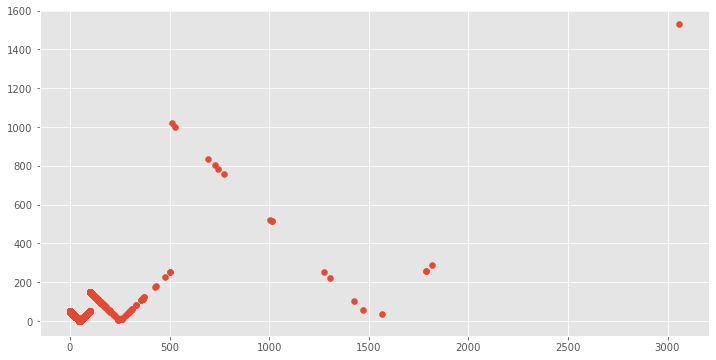

In [7]:
plt.scatter(df['episodes'],df['Distance'])

In [8]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[["episodes",'Distance']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
df["cluster"] = y_predicted
df.head(3)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link,Distance,cluster
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...,25.0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...,28.0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss,37.0,0


In [11]:
km.cluster_centers_

array([[   8.63264174,   42.16106736],
       [1341.625     ,  483.3125    ],
       [ 174.65258216,  113.6056338 ]])

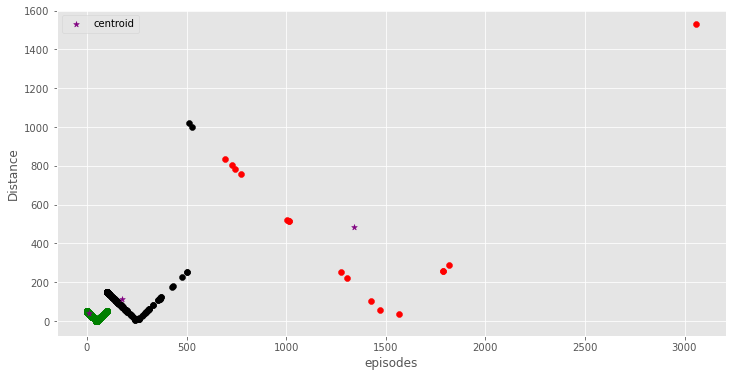

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.episodes,df1['Distance'],color='green')
plt.scatter(df2.episodes,df2['Distance'],color='red')
plt.scatter(df3.episodes,df3['Distance'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('episodes')
plt.ylabel('Distance')
plt.legend()

## Preproccessing using min and max scaler

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Distance']])
df['Distance'] = scaler.transform(df[['Distance']])

scaler.fit(df[['episodes']])
df['episodes'] = scaler.transform(df[['episodes']])

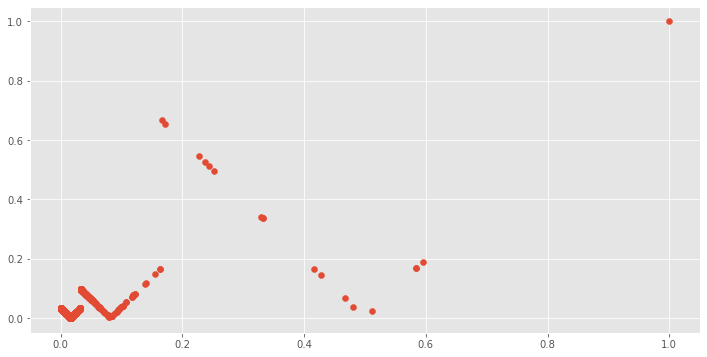

In [14]:
plt.scatter(df['episodes'],df['Distance'])